### 1. Importing library

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import math
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# ML module
import sklearn
from sklearn.model_selection import train_test_split ## splite data into train data and validation data
from sklearn.preprocessing import StandardScaler     
from sklearn.metrics import r2_score                 
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")
# # change cell width
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
# # Run with Cuda if GUP is availiable
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

In [ ]:
# Fixing random seed no.
import random as rn
def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_seed(seed) # tensorflowのシードを固定

In [ ]:
reset_seed(1234)

### 2. Importing & cleansing raw data

In [ ]:
data_dir = r'/content/drive/MyDrive/Colab Notebooks/CGH/AID3 (AID Phase 2) [Oct21 to ]/DataForLICV4122'
data_filelist = os.listdir(data_dir)
file_num = len(data_filelist)
print("file_no.:",file_num)
print("file_name:",*data_filelist, sep="\n")

# Read Data and Integrate into 1 Data Frame
df_raw = pd.DataFrame()
for i_file in range(file_num):
    file_dir = data_dir + "/" + data_filelist[i_file]
    print(file_dir)
    df_tmp = pd.read_pickle(file_dir)
    df_raw = pd.concat([df_raw, df_tmp])
print("df_raw.shape:", df_raw.shape)

file_no.: 2
file_name:
Data_for_LICV4122_02.pkl
Data_for_LICV4122_01.pkl
/content/drive/MyDrive/Colab Notebooks/CGH/AID3 (AID Phase 2) [Oct21 to ]/DataForLICV4122/Data_for_LICV4122_02.pkl
/content/drive/MyDrive/Colab Notebooks/CGH/AID3 (AID Phase 2) [Oct21 to ]/DataForLICV4122/Data_for_LICV4122_01.pkl
df_raw.shape: (27360, 126)


In [ ]:
df_raw.describe() #Checking raw data distribution in summary

,TI_4124.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,TI_4128.PV,FI_4118.PV,TI_4132.PV,FI_4119.PV,TI_4131.PV,LC_4119.PV,TI_4133.PV,FC_4136.PV,FI_4120.PV,LC_4120.PV,LC_4121.PV,TI_4134.PV,SC_4108.GF,SC_4108.H6,SC_4108.H7,SC_4108.HH,TI_4190.PV,PC_4111.PV,PC_4111.OP,TI_4135.PV,TI_4165.PV,TI_4152.PV,TI_4164.PV,TI_4159.PV,TI_4160.PV,TI_4163.PV,TI_4136.PV,TI_4140.PV,TC_4120.PV,TI_4137.PV,TI_4138.PV,TI_4162.PV,TI_4161.PV,TI_4139.PV,...,SC_4112.EE,SC_4112.F6,SC_4112.F8,SC_4112.F9,SC_4112.FC,SC_4112.FF,SC_4112.FI,SC_4112.FL,SC_4112.FO,SC_4112.FR,SC_4112.MI,SC_4112.ML,SC_4112.MM,FC_4132.PV,FSI4170.PV,FSI4133.PV,TI_4150.PV,LC_4122.OP,TI_4101.PV,PD_4101.PV,FI_4117.PV,HC_4105.OP,LC_4101.PV,LC_4101.OP,TI_4102.PV,FSI4101.PV,PC_4102.PV,LIX41022.PV,LIX41023.PV,AI_41021.PV,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
count,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.00,27360.000000,27360.0,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,...,27360.0,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.0,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.0,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000,27360.000000
mean,188.956020,49.979216,49.936076,72.885942,0.752102,32.415040,34.658938,2.156574,174.859180,10.248976,135.149135,49.980837,186.115813,2.628920,556.184613,49.941578,39.997342,33.529896,43.299999,0.95,27.299999,3.5,212.145884,0.450865,67.681357,299.196206,304.672875,296.053004,554.658830,406.159065,400.627275,638.573678,355.468478,349.681320,350.019359,350.967105,346.188249,400.002170,396.583858,345.473001,...,1.1,305.895833,358.684211,380.107456,405.835526,426.853070,447.705044,471.831140,499.452851,526.020833,5.721053,1.090132,2.335088,34.799816,0.0,34.141934,22.043622,60.069354,88.718555,0.133586,3.218768,100.0,60.136308,72.381981,165.327753,302.276925,0.199915,99.995696,99.945256,0.352638,910.061634,233.979500,238.795172,70.017576,1.265202,4.765119,28.450652,0.103774,17.908502,120.294584
std,6.525042,0.177987,0.252602,2.731679,0.003147,2.603746,2.331386,0.789552,6.364341,1.053493,3.629299,0.986149,5.882531,0.121813,156.595907,0.291042,0.496831,4.860942,0.000000,0.00,0.000000,0.0,4.822606,0.002877,20.763873,1.452248,3.616165,4.192089,24.006043,2.106901,1.645961,22.589932,1.180891,0.730902,0.706964,0.889252,0.779838,3.081354,3.273930,1.620519,...,0.0,4.046759,2.078819,3.108384,3.916038,5.506707,7.479286,10.072292,12.995744,3.022469,3.588435,0.506384,2.753580,3.572560,0.0,3.559848,3.269602,7.293272,6.854511,0.038010,8.272885,0.0,1.100453,7.833859,3.595552,29.619538,0.002087,0.096061,0.446903,0.192571,10.287929,28.360473,28.070989,6.357656,0.119356,6.980339,23.006598,1.027350,18.405171,5.067227
min,175.993492,47.872442,48.502020,67.604453,0.736945,24.105434,28.334804,0.691660,162.691842,8.632983,127.947865,41.609144,174.296509,2.441449,356.204198,47.777304,38.473221,22.007292,43.299999,0.95,27.299999,3.5,203.558024,0.438416,48.174893,291.329060,297.008017,280.172065,507.734301,394.452764,390.933586,557.996721,343.594771,340.922421,340.886889,343.605375,338.636473,381.295117,386.347232,332.292363,...,1.1,294.500000,357.500000,378.000000,403.000000,423.000000,443.000000,465.500000,491.500000,522.500000,3.100000,0.500000,0.400000,28.969973,0.0,28.2

In [ ]:
df = df_raw.copy()
df.dropna(inplace=True)
df #Checking raw data

,TI_4124.PV,LA_4104.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,LC_4109.PV,TI_4128.PV,FI_4118.PV,TI_4132.PV,FI_4119.PV,TI_4131.PV,LC_4119.PV,TI_4133.PV,FC_4136.PV,SC-4115,FI_4120.PV,LC_4120.PV,LC_4121.PV,TI_4134.PV,SC_4108.GF,SC_4108.H6,SC_4108.H7,SC_4108.HH,TI_4190.PV,PC_4111.PV,PC_4111.OP,TI_4135.PV,TI_4165.PV,TI_4152.PV,TI_4164.PV,TI_4159.PV,TI_4160.PV,TI_4163.PV,TI_4136.PV,TI_4140.PV,TC_4120.PV,TI_4137.PV,TI_4138.PV,...,SC_4112.FC,SC_4112.FF,SC_4112.FI,SC_4112.FL,SC_4112.FO,SC_4112.FR,SC_4112.MI,SC_4112.ML,SC_4112.MM,SC_4112.MN,FC_4132.PV,FSI4170.PV,FSI4133.PV,TI_4150.PV,LC_4122.OP,TI_4101.PV,PD_4101.PV,FI_4117.PV,HC_4105.OP,LC_4101.PV,LC_4101.OP,TI_4102.PV,FSI4101.PV,PC_4102.PV,LIX41022.PV,LIX41023.PV,FS-4101-1.PV,TA_4137.PV,LICA-4126.PV,AI_41021.PV,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
2021-01-06 12:00:00.003,192.039111,No Data,50.015868,50.054942,73.926023,0.754260,30.698971,54.8767,32.934088,1.764795,176.979192,12.881115,137.085299,48.650832,188.198456,2.753863,No Data,633.338914,50.007877,40.719132,33.754734,43.299999,0.95,27.299999,3.5,212.551298,0.443820,90.945305,297.855024,306.779803,293.792671,583.329902,402.335555,396.289284,654.233488,352.538622,347.612254,348.149847,348.391113,344.156715,...,413.5,438.0,463.0,492.5,526.0,526.5,11.0,1.5,6.1,8,36.007738,0,35.354050,23.794540,68.678070,77.58437,0.127829,0.0,100,59.980960,77.394588,167.442403,325.565683,0.198746,100.0,100.0,No Data,[-11059] No Good Data For Calculation,No Data,0.242626,903.360012,274.501162,281.730884,72.516382,1.158850,16.052974,0.0,0.0,13.999874,113.330084
2021-01-06 12:01:00.003,192.143439,No Data,50.016703,50.032037,73.922797,0.754030,30.699176,54.7977,32.942510,1.731745,177.003154,13.012254,137.079682,48.584659,188.259884,2.748331,No Data,632.312607,50.005010,40.634352,33.743824,43.299999,0.95,27.299999,3.5,212.551921,0.442550,90.745028,297.876465,306.729795,294.061182,583.596418,402.371920,396.309739,652.959027,352.612752,347.813598,348.324610,348.497090,344.379355,...,413.5,438.0,463.0,492.5,526.0,526.5,11.0,1.5,6.1,8,36.046559,0,35.358090,23.706602,68.553498,77.58538,0.136065,0.0,100,59.899177,77.276471,167.434436,325.489843,0.198537,100.0,100.0,No Data,[-11059] No Good Data For Calculation,No Data,0.241984,903.325723,274.004838,281.581960,72.351931,1.161250,16.129151,0.0,0.0,13.999874,113.320957
2021-01-06 12:02:00.003,192.247768,No Data,50.017537,50.009133,73.919571,0.753801,30.699381,54.7187,32.950933,1.681566,177.027116,13.089134,137.074065,48.666570,188.307346,2.745973,No Data,631.257719,50.002144,40.452179,33.741095,43.299999,0.95,27.299999,3.5,212.552544,0.441946,90.544751,297.881829,306.679787,294.351156,583.862933,402.408286,396.330193,652.996869,352.718654,348.089101,348.522757,348.682525,344.665594,...,413.5,438.0,463.0,492.5,526.0,526.5,11.0,1.5,6.1,8,36.069619,0,35.378977,23.610421,68.428926,77.58639,0.144301,0.0,100,59.817393,77.158354,167.426468,325.395533,0.198327,100.0,100.0,No Data,[-11059] No Good Data For Calculation,No Data,0.240137,903.291434,273.387879,281.290217,72.211362,1.163651,16.169294,0.0,0.0,13.999874,113.311829
2021-01-06 12:03:00.003,192.352097,No Data,50.018372,49.986228,73.916345,0.753572,30.699586,54.6396,32.959356,1.602392,177.051077,13.070562,137.068448,48.748480,188.318512,2.748006,No Data,630.202831,49.999278,40.270007,33.702903,43.299999,0.95,27.299999,3.5,212.553167,0.441532,90.344474,297.956909,306.629779,294.641074,584.129448,402.444651,396.350647,653.034711,352.962256,348.226860,348.724085,348.799082,344.951822,...,413.5,438.0,463.0,492.5,526.0,526.5,11.0,1.5,6.1,8,36.070622,0,35.439515,23.549962,68.304354,77.58740,0.152537,0.0,100,59.735610,77.041164,167.418500,325.191182,0.198118,100.0,100.0,No Data,[-11059] No Good Data For Calculation,No Data,0.238197,903.257146,272.550505,280.617393,72.105275,1.166051,16.195562,0.0,0.0,13.999874,113.302701
2021-01-06 12:04:00.003,192.456425,No Data,50.019207,49.963324,

In [ ]:
# explanatory/Input variable - given
list_x = [
    'FC_4121.PV',
    'FC_4137.PV',
    'TI_4144.PV',
    'PC_4112.PV',
    'FC_4125.PV',
    'FC_4126.PV',
    'LC_4122.PV',
    'FI_4117.PV',
    'AI_41022.PV',
    'FSI4135.PV',
    'TI_4151.PV',
    'PCX4129.PV',
    'HC_4113.OP'
]

# Target/Output variable
list_y = [
    'LC_4122.OP' 
]

list_all = [
    'FC_4121.PV',
    'FC_4137.PV',
    'TI_4144.PV',
    'PC_4112.PV',
    'FC_4125.PV',
    'FC_4126.PV',
    'LC_4122.PV',
    'FI_4117.PV',
    'AI_41022.PV',
    'FSI4135.PV',
    'TI_4151.PV',
    'PCX4129.PV',
    'HC_4113.OP',
    'LC_4122.OP' #Target Variable
]

In [ ]:
df = df[list_all] # Filtering input & output features
df

,FC_4121.PV,FC_4137.PV,TI_4144.PV,PC_4112.PV,FC_4125.PV,FC_4126.PV,LC_4122.PV,FI_4117.PV,AI_41022.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,HC_4113.OP,LC_4122.OP
2021-01-06 12:00:00.003,86.409064,5.593698,333.616774,0.071545,44.162644,42.029026,49.253565,0.0,903.360012,281.730884,72.516382,1.158850,13.999874,68.678070
2021-01-06 12:01:00.003,86.341717,5.591818,333.638000,0.071832,44.195685,42.035635,49.141454,0.0,903.325723,281.581960,72.351931,1.161250,13.999874,68.553498
2021-01-06 12:02:00.003,86.274370,5.590812,333.638000,0.072075,44.207395,42.044307,49.029342,0.0,903.291434,281.290217,72.211362,1.163651,13.999874,68.428926
2021-01-06 12:03:00.003,86.207022,5.591022,333.638000,0.072314,44.189693,42.055782,48.917230,0.0,903.257146,280.617393,72.105275,1.166051,13.999874,68.304354
2021-01-06 12:04:00.003,86.139675,5.592123,333.643310,0.072608,44.161926,42.053070,48.806547,0.0,903.222857,279.749582,72.012450,1.168452,13.999874,68.179781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 11:55:00.003,86.745800,5.597932,333.446930,0.070336,44.108755,42.045722,49.814124,0.0,904.843422,292.628956,73.545900,1.146848,13.999874,69.300932
2021-01-06 11:56:00.003,86.678453,5.595490,333.446930,0.070576,44.145152,42.049208,49.702012,0.0,904.304982,283.177685,73.137206,1.149248,13.999874,69.176359
2021-01-06 11:57:00.003,86.611106,5.593369,333.446930,0.070783,44.146455,42.033271,49.589901,0.0,903.589730,282.820498,73.004532,1.151649,13.999874,69.051787
2021-01-06 11:58:00.003,86.543758,5.592637,333.452239,0.071016,44.147429,42.024454,49.477789,0.0,903.428589,282.704544,72.946158,1.154049,13.999874,68.927215


### 3. Adding features

In [ ]:
# Adding some important features again, in order to increase model accuracy.
# Important features have been selected from Random Forest algorithm prediction result.

I_features = df[['FSI4135.PV', 'FC_4125.PV']]
I_features = I_features.rename(columns={"FSI4135.PV": "FSI4135_2.PV", "FC_4125.PV": "FC_4125_2.PV"})
I_features = I_features.shift(periods=1)
for n, tag in enumerate(I_features.loc[:, :].columns):
    df[tag] = I_features[tag]

In [ ]:
# change "string" to "NaN"
df_PAS_required_removeString = []
for col in df.columns[:]:
    remove_string = pd.to_numeric(df[col], errors='coerce')
    df_PAS_required_removeString.append(remove_string)
    
pd.DataFrame(df_PAS_required_removeString).T

,FC_4121.PV,FC_4137.PV,TI_4144.PV,PC_4112.PV,FC_4125.PV,FC_4126.PV,LC_4122.PV,FI_4117.PV,AI_41022.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,HC_4113.OP,LC_4122.OP,FSI4135_2.PV,FC_4125_2.PV
2021-01-06 12:00:00.003,86.409064,5.593698,333.616774,0.071545,44.162644,42.029026,49.253565,0.0,903.360012,281.730884,72.516382,1.158850,13.999874,68.678070,NaN,NaN
2021-01-06 12:01:00.003,86.341717,5.591818,333.638000,0.071832,44.195685,42.035635,49.141454,0.0,903.325723,281.581960,72.351931,1.161250,13.999874,68.553498,281.730884,44.162644
2021-01-06 12:02:00.003,86.274370,5.590812,333.638000,0.072075,44.207395,42.044307,49.029342,0.0,903.291434,281.290217,72.211362,1.163651,13.999874,68.428926,281.581960,44.195685
2021-01-06 12:03:00.003,86.207022,5.591022,333.638000,0.072314,44.189693,42.055782,48.917230,0.0,903.257146,280.617393,72.105275,1.166051,13.999874,68.304354,281.290217,44.207395
2021-01-06 12:04:00.003,86.139675,5.592123,333.643310,0.072608,44.161926,42.053070,48.806547,0.0,903.222857,279.749582,72.012450,1.168452,13.999874,68.179781,280.617393,44.189693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 11:55:00.003,86.745800,5.597932,333.446930,0.070336,44.108755,42.045722,49.814124,0.0,904.843422,292.628956,73.545900,1.146848,13.999874,69.300932,304.840725,44.047157
2021-01-06 11:56:00.003,86.678453,5.595490,333.446930,0.070576,44.145152,42.049208,49.702012,0.0,904.304982,283.177685,73.137206,1.149248,13.999874,69.176359,292.628956,44.108755
2021-01-06 11:57:00.003,86.611106,5.593369,333.446930,0.070783,44.146455,42.033271,49.589901,0.0,903.589730,282.820498,73.004532,1.151649,13.999874,69.051787,283.177685,44.145152
2021-01-06 11:58:00.003,86.543758,5.592637,333.452239,0.071016,44.147429,42.024454,49.477789,0.0,903.428589,282.704544,72.946158,1.154049,13.999874,68.927215,282.820498,44.146455


In [ ]:
# remove "NaN" row
df_dropna = pd.DataFrame(df_PAS_required_removeString).T.dropna(how="any")
df = df_dropna
df

,FC_4121.PV,FC_4137.PV,TI_4144.PV,PC_4112.PV,FC_4125.PV,FC_4126.PV,LC_4122.PV,FI_4117.PV,AI_41022.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,HC_4113.OP,LC_4122.OP,FSI4135_2.PV,FC_4125_2.PV
2021-01-06 12:01:00.003,86.341717,5.591818,333.638000,0.071832,44.195685,42.035635,49.141454,0.0,903.325723,281.581960,72.351931,1.161250,13.999874,68.553498,281.730884,44.162644
2021-01-06 12:02:00.003,86.274370,5.590812,333.638000,0.072075,44.207395,42.044307,49.029342,0.0,903.291434,281.290217,72.211362,1.163651,13.999874,68.428926,281.581960,44.195685
2021-01-06 12:03:00.003,86.207022,5.591022,333.638000,0.072314,44.189693,42.055782,48.917230,0.0,903.257146,280.617393,72.105275,1.166051,13.999874,68.304354,281.290217,44.207395
2021-01-06 12:04:00.003,86.139675,5.592123,333.643310,0.072608,44.161926,42.053070,48.806547,0.0,903.222857,279.749582,72.012450,1.168452,13.999874,68.179781,280.617393,44.189693
2021-01-06 12:05:00.003,86.072328,5.594438,333.717631,0.072875,44.120597,42.030875,48.761516,0.0,903.188568,278.447535,71.954109,1.170852,13.999874,68.055209,279.749582,44.161926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 11:55:00.003,86.745800,5.597932,333.446930,0.070336,44.108755,42.045722,49.814124,0.0,904.843422,292.628956,73.545900,1.146848,13.999874,69.300932,304.840725,44.047157
2021-01-06 11:56:00.003,86.678453,5.595490,333.446930,0.070576,44.145152,42.049208,49.702012,0.0,904.304982,283.177685,73.137206,1.149248,13.999874,69.176359,292.628956,44.108755
2021-01-06 11:57:00.003,86.611106,5.593369,333.446930,0.070783,44.146455,42.033271,49.589901,0.0,903.589730,282.820498,73.004532,1.151649,13.999874,69.051787,283.177685,44.145152
2021-01-06 11:58:00.003,86.543758,5.592637,333.452239,0.071016,44.147429,42.024454,49.477789,0.0,903.428589,282.704544,72.946158,1.154049,13.999874,68.927215,282.820498,44.146455


### 4. Train & Trial data segregation

In [ ]:
# Last 10% of data shall be Trial, and first 90% of data shall be Train
Total_Data = df.shape[0]
print('Total Data 100% => ', Total_Data)
Train_Data = Total_Data * 0.9
Train_Data = round(Train_Data)
Trial_Data = Total_Data - Train_Data
print('Train Data 90% => {} / Trial Data 10% => {}'.format(Train_Data, Trial_Data))

Total Data 100% =>  27359
Train Data 90% => 24623 / Trial Data 10% => 2736


In [ ]:
# Last 10% of data shall be trial
df_trial = df[Train_Data:]
df_trial

,FC_4121.PV,FC_4137.PV,TI_4144.PV,PC_4112.PV,FC_4125.PV,FC_4126.PV,LC_4122.PV,FI_4117.PV,AI_41022.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,HC_4113.OP,LC_4122.OP,FSI4135_2.PV,FC_4125_2.PV
2021-01-04 14:24:00.002,86.552879,5.694447,336.694763,0.071663,43.774104,42.638009,50.141334,41.069898,925.784335,269.143685,82.264871,1.182492,1.999874,69.225169,271.136539,43.750168
2021-01-04 14:25:00.002,86.548634,5.696614,336.694763,0.071594,43.797411,42.669902,50.123794,41.356983,925.830699,274.014208,82.515495,1.171786,1.999874,69.249907,269.143685,43.774104
2021-01-04 14:26:00.002,86.544389,5.697802,336.694763,0.071625,43.805391,42.676238,50.106255,34.176373,925.877064,278.448344,82.840761,1.166492,1.999874,69.274646,274.014208,43.797411
2021-01-04 14:27:00.002,86.540144,5.697648,336.694763,0.071669,43.792349,42.647388,50.088716,13.784967,925.923428,281.053551,83.027414,1.180692,1.999874,69.299385,278.448344,43.805391
2021-01-04 14:28:00.002,86.535899,5.698447,336.694763,0.071620,43.748200,42.619814,50.071176,0.287086,925.969793,281.917536,83.160753,1.192740,1.999874,69.324124,281.053551,43.792349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 11:55:00.003,86.745800,5.597932,333.446930,0.070336,44.108755,42.045722,49.814124,0.000000,904.843422,292.628956,73.545900,1.146848,13.999874,69.300932,304.840725,44.047157
2021-01-06 11:56:00.003,86.678453,5.595490,333.446930,0.070576,44.145152,42.049208,49.702012,0.000000,904.304982,283.177685,73.137206,1.149248,13.999874,69.176359,292.628956,44.108755
2021-01-06 11:57:00.003,86.611106,5.593369,333.446930,0.070783,44.146455,42.033271,49.589901,0.000000,903.589730,282.820498,73.004532,1.151649,13.999874,69.051787,283.177685,44.145152
2021-01-06 11:58:00.003,86.543758,5.592637,333.452239,0.071016,44.147429,42.024454,49.477789,0.000000,903.428589,282.704544,72.946158,1.154049,13.999874,68.927215,282.820498,44.146455


In [ ]:
# First 90% of data shall be train
df_train = df[:Train_Data]
df_train

,FC_4121.PV,FC_4137.PV,TI_4144.PV,PC_4112.PV,FC_4125.PV,FC_4126.PV,LC_4122.PV,FI_4117.PV,AI_41022.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,HC_4113.OP,LC_4122.OP,FSI4135_2.PV,FC_4125_2.PV
2021-01-06 12:01:00.003,86.341717,5.591818,333.638000,0.071832,44.195685,42.035635,49.141454,0.000000,903.325723,281.581960,72.351931,1.161250,13.999874,68.553498,281.730884,44.162644
2021-01-06 12:02:00.003,86.274370,5.590812,333.638000,0.072075,44.207395,42.044307,49.029342,0.000000,903.291434,281.290217,72.211362,1.163651,13.999874,68.428926,281.581960,44.195685
2021-01-06 12:03:00.003,86.207022,5.591022,333.638000,0.072314,44.189693,42.055782,48.917230,0.000000,903.257146,280.617393,72.105275,1.166051,13.999874,68.304354,281.290217,44.207395
2021-01-06 12:04:00.003,86.139675,5.592123,333.643310,0.072608,44.161926,42.053070,48.806547,0.000000,903.222857,279.749582,72.012450,1.168452,13.999874,68.179781,280.617393,44.189693
2021-01-06 12:05:00.003,86.072328,5.594438,333.717631,0.072875,44.120597,42.030875,48.761516,0.000000,903.188568,278.447535,71.954109,1.170852,13.999874,68.055209,279.749582,44.161926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04 14:19:00.002,86.574105,5.699537,336.694763,0.072179,43.747568,42.609329,50.229030,0.000000,925.552512,275.964230,82.235542,1.188389,1.999874,69.101474,276.291341,43.661113
2021-01-04 14:20:00.002,86.569860,5.697922,336.694763,0.071992,43.780556,42.623685,50.211491,0.000000,925.598877,275.925385,82.238209,1.187680,1.999874,69.126213,275.964230,43.747568
2021-01-04 14:21:00.002,86.565615,5.692122,336.694763,0.071792,43.739701,42.618646,50.193952,0.000000,925.645241,276.604257,82.275531,1.186971,1.999874,69.150952,275.925385,43.780556
2021-01-04 14:22:00.002,86.561369,5.689757,336.694763,0.071747,43.726003,42.617536,50.176412,7.180610,925.691606,275.765241,82.318184,1.186263,1.999874,69.175691,276.604257,43.739701


In [ ]:
train_index, trial_index = df_train.index, df_trial.index
print('** train = {} / trial = {}'.format(len(train_index),len(trial_index)))

** train = 24623 / trial = 2736


In [ ]:
# train and validation data
df_X = df_train.drop(list_y, axis=1) # Feature
df_y = df_train.loc[:,list_y] # Target

In [ ]:
# trial data
df_X_trial = df_trial.drop(list_y, axis=1) # Feature
df_y_trial = df_trial.loc[:,list_y] # target

### 5. Visualization the distribution of data

Target variable size comparison
Train data size: 24623 → Trial data size: 2736 

LC_4122.OP , Train / Trial, mini:   4.59e+01 → 5.53e+01
LC_4122.OP , Train / Trial, mean:   5.89e+01 → 7.10e+01
LC_4122.OP , Train / Trial, mode:   5.30e+01 → 7.19e+01
LC_4122.OP , Train / Trial, median: 5.98e+01 → 7.15e+01
LC_4122.OP , Train / Trial, maxi:   8.97e+01 → 7.65e+01 



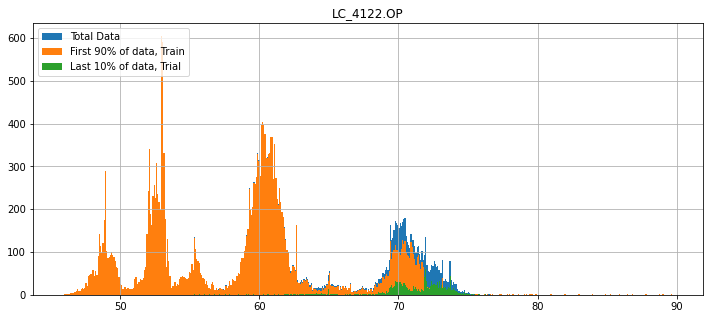

In [ ]:
# For target variable
Target_tag = list_y # which is 'LC_4122.PV'
print("Target variable size comparison")
print("Train data size:", df_y.shape[0], "→", "Trial data size:", df_y_trial.shape[0],"\n")

# Comparison graph
for tag in df.loc[:, Target_tag].columns:
    plt.figure(figsize=(12, 5))
    n_raw, bins_raw, patches_raw       = plt.hist(x=df[tag], bins= 500, alpha=1, label="Total Data")
    n_train, bins_train, patches_train = plt.hist(x=df_y[tag], bins= 500, alpha=1, label="First 90% of data, Train")
    n, bins, patches                   = plt.hist(x=df_y_trial[tag], bins= 500, alpha=1, label="Last 10% of data, Trial")
    plt.legend(loc="upper left")
    plt.grid()
    plt.title(label=tag)
    mode_index_train = n_train.argmax()
    mode_index = n.argmax()
    print(tag, ', Train / Trial, mini:  ', f"{df_y[tag].min():.2e}", "→", f"{df_y_trial[tag].min():.2e}")
    print(tag, ', Train / Trial, mean:  ', f"{df_y[tag].mean():.2e}", "→", f"{df_y_trial[tag].mean():.2e}")
    print(tag, ', Train / Trial, mode:  ', f"{(bins_train[mode_index_train] + bins_train[mode_index_train+1])/2:.2e}", "→", f"{(bins[mode_index] + bins[mode_index+1])/2:.2e}")
    print(tag, ', Train / Trial, median:', f"{df_y[tag].median():.2e}", "→", f"{df_y_trial[tag].median():.2e}")
    print(tag, ', Train / Trial, maxi:  ', f"{df_y[tag].max():.2e}", "→", f"{df_y_trial[tag].max():.2e}","\n")
    plt.show()

Input variable size comparison
Train data size: 24623 → Trial data size: 2736 

FC_4121.PV , Train / Trial, mini:   6.66e+01 → 7.58e+01
FC_4121.PV , Train / Trial, mean:   7.98e+01 → 8.62e+01
FC_4121.PV , Train / Trial, mode:   8.58e+01 → 8.64e+01
FC_4121.PV , Train / Trial, median: 8.53e+01 → 8.66e+01
FC_4121.PV , Train / Trial, maxi:   9.77e+01 → 8.99e+01 



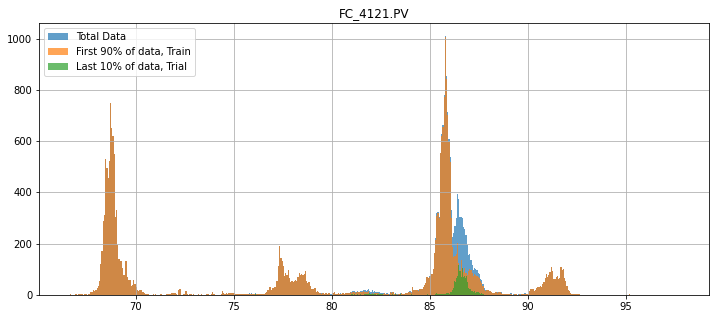

FC_4137.PV , Train / Trial, mini:   4.33e+00 → 5.58e+00
FC_4137.PV , Train / Trial, mean:   5.12e+00 → 5.69e+00
FC_4137.PV , Train / Trial, mode:   5.49e+00 → 5.70e+00
FC_4137.PV , Train / Trial, median: 5.49e+00 → 5.69e+00
FC_4137.PV , Train / Trial, maxi:   5.72e+00 → 5.71e+00 



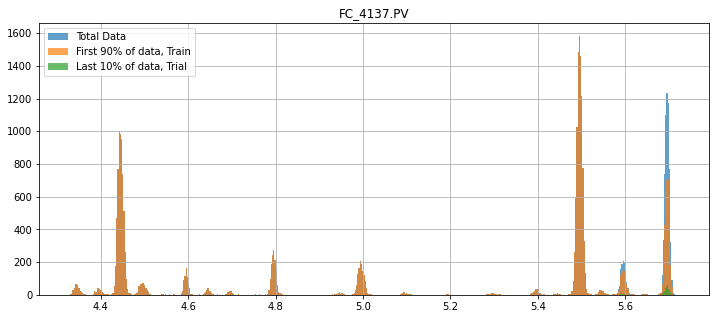

TI_4144.PV , Train / Trial, mini:   3.29e+02 → 3.31e+02
TI_4144.PV , Train / Trial, mean:   3.37e+02 → 3.37e+02
TI_4144.PV , Train / Trial, mode:   3.37e+02 → 3.37e+02
TI_4144.PV , Train / Trial, median: 3.37e+02 → 3.37e+02
TI_4144.PV , Train / Trial, maxi:   3.42e+02 → 3.40e+02 



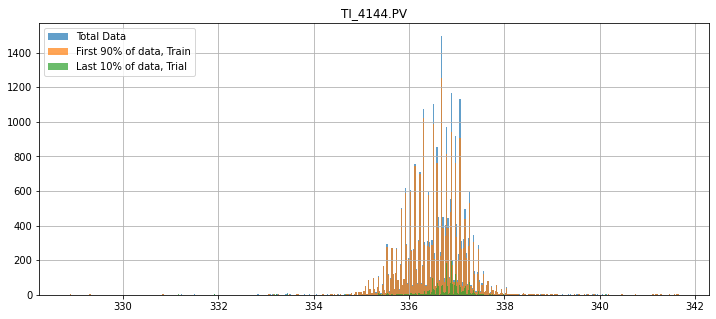

PC_4112.PV , Train / Trial, mini:   6.54e-02 → 6.87e-02
PC_4112.PV , Train / Trial, mean:   7.16e-02 → 7.20e-02
PC_4112.PV , Train / Trial, mode:   7.19e-02 → 7.21e-02
PC_4112.PV , Train / Trial, median: 7.17e-02 → 7.20e-02
PC_4112.PV , Train / Trial, maxi:   7.65e-02 → 7.45e-02 



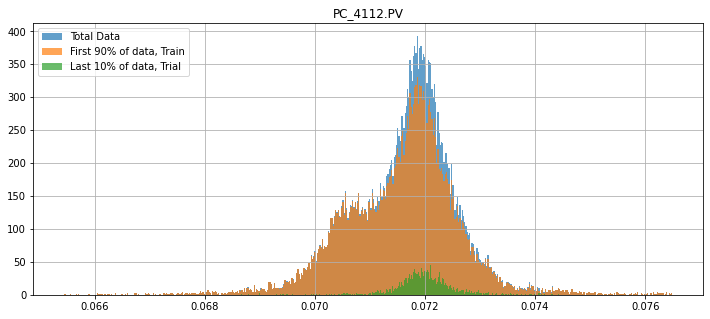

FC_4125.PV , Train / Trial, mini:   3.11e+01 → 3.85e+01
FC_4125.PV , Train / Trial, mean:   3.87e+01 → 4.23e+01
FC_4125.PV , Train / Trial, mode:   4.16e+01 → 4.27e+01
FC_4125.PV , Train / Trial, median: 4.10e+01 → 4.25e+01
FC_4125.PV , Train / Trial, maxi:   4.75e+01 → 4.43e+01 



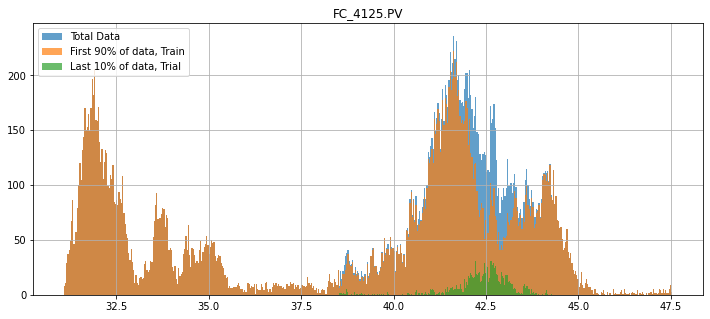

FC_4126.PV , Train / Trial, mini:   3.19e+01 → 4.20e+01
FC_4126.PV , Train / Trial, mean:   3.86e+01 → 4.28e+01
FC_4126.PV , Train / Trial, mode:   3.25e+01 → 4.28e+01
FC_4126.PV , Train / Trial, median: 4.06e+01 → 4.28e+01
FC_4126.PV , Train / Trial, maxi:   4.74e+01 → 4.33e+01 



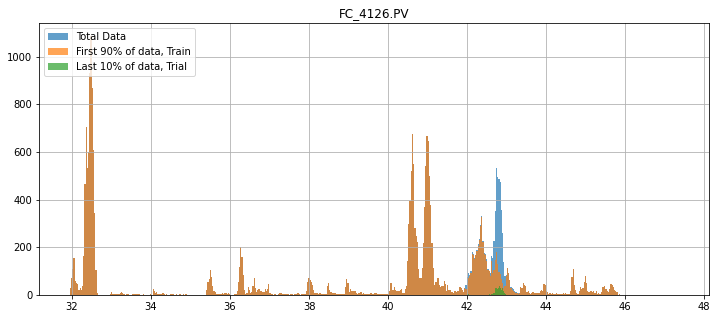

LC_4122.PV , Train / Trial, mini:   4.38e+01 → 4.49e+01
LC_4122.PV , Train / Trial, mean:   5.00e+01 → 4.99e+01
LC_4122.PV , Train / Trial, mode:   5.00e+01 → 5.01e+01
LC_4122.PV , Train / Trial, median: 5.00e+01 → 5.00e+01
LC_4122.PV , Train / Trial, maxi:   6.02e+01 → 5.41e+01 



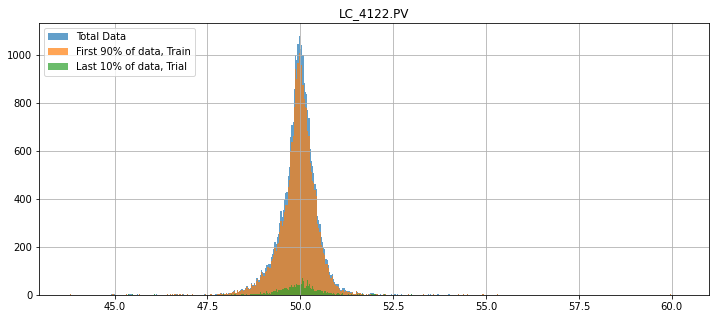

FI_4117.PV , Train / Trial, mini:   0.00e+00 → 0.00e+00
FI_4117.PV , Train / Trial, mean:   2.97e+00 → 5.47e+00
FI_4117.PV , Train / Trial, mode:   4.14e-02 → 4.14e-02
FI_4117.PV , Train / Trial, median: 0.00e+00 → 0.00e+00
FI_4117.PV , Train / Trial, maxi:   4.14e+01 → 4.14e+01 



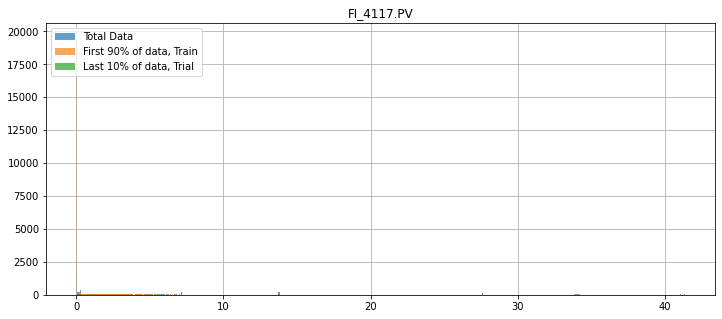

AI_41022.PV , Train / Trial, mini:   9.01e+02 → 9.03e+02
AI_41022.PV , Train / Trial, mean:   9.08e+02 → 9.25e+02
AI_41022.PV , Train / Trial, mode:   9.03e+02 → 9.26e+02
AI_41022.PV , Train / Trial, median: 9.04e+02 → 9.26e+02
AI_41022.PV , Train / Trial, maxi:   9.28e+02 → 9.28e+02 



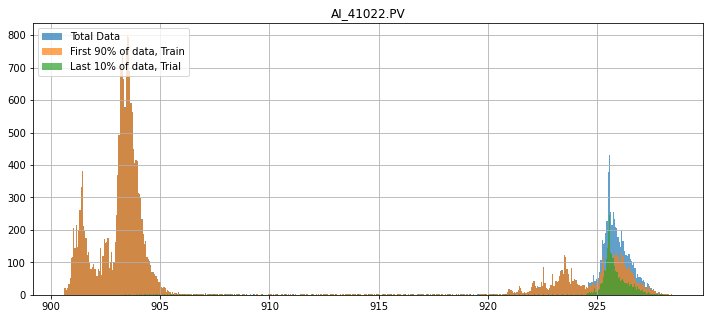

FSI4135.PV , Train / Trial, mini:   1.72e+02 → 2.13e+02
FSI4135.PV , Train / Trial, mean:   2.35e+02 → 2.76e+02
FSI4135.PV , Train / Trial, mode:   2.34e+02 → 2.77e+02
FSI4135.PV , Train / Trial, median: 2.34e+02 → 2.77e+02
FSI4135.PV , Train / Trial, maxi:   3.15e+02 → 3.05e+02 



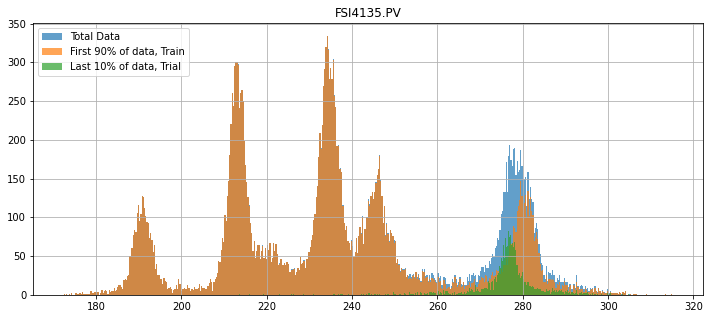

TI_4151.PV , Train / Trial, mini:   6.28e+01 → 6.63e+01
TI_4151.PV , Train / Trial, mean:   6.96e+01 → 7.41e+01
TI_4151.PV , Train / Trial, mode:   6.50e+01 → 6.78e+01
TI_4151.PV , Train / Trial, median: 6.64e+01 → 6.83e+01
TI_4151.PV , Train / Trial, maxi:   8.47e+01 → 8.47e+01 



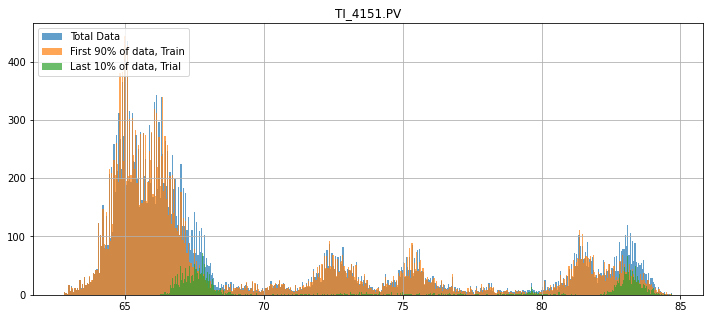

PCX4129.PV , Train / Trial, mini:   1.03e+00 → 1.09e+00
PCX4129.PV , Train / Trial, mean:   1.27e+00 → 1.19e+00
PCX4129.PV , Train / Trial, mode:   1.43e+00 → 1.19e+00
PCX4129.PV , Train / Trial, median: 1.19e+00 → 1.19e+00
PCX4129.PV , Train / Trial, maxi:   1.53e+00 → 1.45e+00 



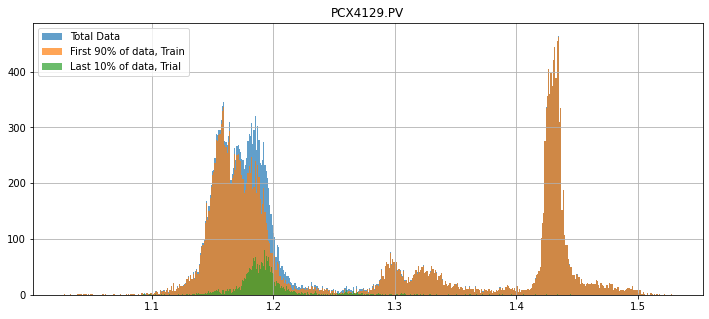

HC_4113.OP , Train / Trial, mini:   2.00e+00 → 2.00e+00
HC_4113.OP , Train / Trial, mean:   1.96e+01 → 2.50e+00
HC_4113.OP , Train / Trial, mode:   2.04e+00 → 2.01e+00
HC_4113.OP , Train / Trial, median: 2.60e+00 → 2.00e+00
HC_4113.OP , Train / Trial, maxi:   4.00e+01 → 1.40e+01 



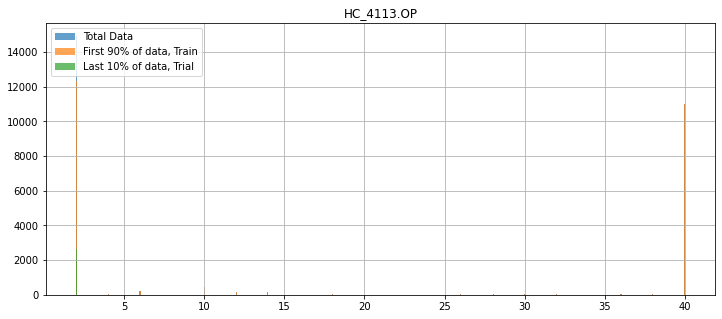

FSI4135_2.PV , Train / Trial, mini:   1.72e+02 → 2.13e+02
FSI4135_2.PV , Train / Trial, mean:   2.35e+02 → 2.76e+02
FSI4135_2.PV , Train / Trial, mode:   2.34e+02 → 2.77e+02
FSI4135_2.PV , Train / Trial, median: 2.34e+02 → 2.77e+02
FSI4135_2.PV , Train / Trial, maxi:   3.15e+02 → 3.05e+02 



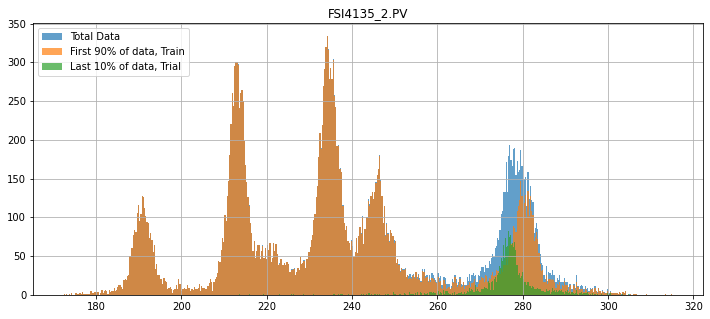

FC_4125_2.PV , Train / Trial, mini:   3.11e+01 → 3.85e+01
FC_4125_2.PV , Train / Trial, mean:   3.87e+01 → 4.23e+01
FC_4125_2.PV , Train / Trial, mode:   4.16e+01 → 4.27e+01
FC_4125_2.PV , Train / Trial, median: 4.10e+01 → 4.25e+01
FC_4125_2.PV , Train / Trial, maxi:   4.75e+01 → 4.43e+01 



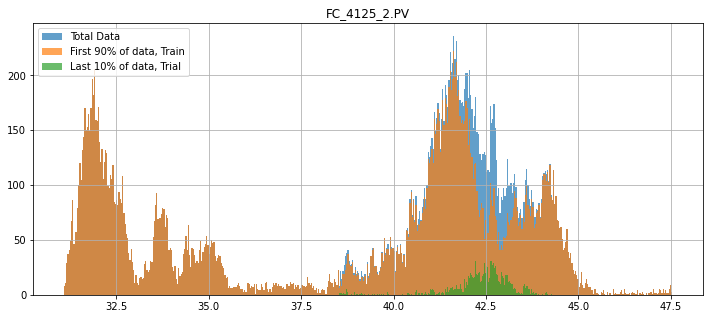

In [ ]:
# For input variable
Input_tag = df_X.loc[:, :].columns
print("Input variable size comparison")
print("Train data size:", df_X.shape[0], "→", "Trial data size:", df_X_trial.shape[0],"\n")

# Comparison graph

for tag in df.loc[:, Input_tag].columns:
    plt.figure(figsize=(12, 5))
    n_raw, bins_raw, patches_raw       = plt.hist(x=df[tag], bins= 500, alpha=0.7, label="Total Data")
    n_train, bins_train, patches_train = plt.hist(x=df_X[tag], bins= 500, alpha=0.7, label="First 90% of data, Train")
    n, bins, patches                   = plt.hist(x=df_X_trial[tag], bins= 500, alpha=0.7, label="Last 10% of data, Trial")
    plt.legend(loc="upper left")
    plt.grid()
    plt.title(label=tag)
    mode_index_train = n_train.argmax()
    mode_index = n.argmax()
    print(tag, ', Train / Trial, mini:  ', f"{df_X[tag].min():.2e}", "→", f"{df_X_trial[tag].min():.2e}")
    print(tag, ', Train / Trial, mean:  ', f"{df_X[tag].mean():.2e}", "→", f"{df_X_trial[tag].mean():.2e}")
    print(tag, ', Train / Trial, mode:  ', f"{(bins_train[mode_index_train] + bins_train[mode_index_train+1])/2:.2e}", "→", f"{(bins[mode_index] + bins[mode_index+1])/2:.2e}")
    print(tag, ', Train / Trial, median:', f"{df_X[tag].median():.2e}", "→", f"{df_X_trial[tag].median():.2e}")
    print(tag, ', Train / Trial, maxi:  ', f"{df_X[tag].max():.2e}", "→", f"{df_X_trial[tag].max():.2e}","\n")
    plt.show()

### 6. Standalize data

In [ ]:
# standalize train and validation data (X & y)
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
train_X_std = sc_X.fit_transform(df_X.values)
train_y_std = sc_y.fit_transform(df_y.values)

In [ ]:
trial_X_std = sc_X.transform(df_X_trial.values)
trial_y_std = sc_y.transform(df_y_trial.values)

### 7. Visualize training/trial data

In [ ]:
col_y = df_y.columns.tolist()
col_x = df_X.columns.tolist()
print(col_y)
print(col_x)

['LC_4122.OP']
['FC_4121.PV', 'FC_4137.PV', 'TI_4144.PV', 'PC_4112.PV', 'FC_4125.PV', 'FC_4126.PV', 'LC_4122.PV', 'FI_4117.PV', 'AI_41022.PV', 'FSI4135.PV', 'TI_4151.PV', 'PCX4129.PV', 'HC_4113.OP', 'FSI4135_2.PV', 'FC_4125_2.PV']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.rcParams['legend.facecolor'] = 'lightgoldenrodyellow'
plt.rcParams['grid.color'] = 'white'


def create_multi_axis_free(block_fig_size, n_block, axis_margin):
    
    # block で指定したサイズのaxisを複数生成
    
    figsize_x_max = 18
    margin_x, margin_y = axis_margin[0], axis_margin[1]
    n_block_x, n_y = n_block[0], n_block[1]
    n_axis_block = len(block_fig_size)    

    # create axis 4 corner positions in block
    axis_in_block = []
    bottom_,left_, height_max = margin_y, margin_x, 0  
    for k in range(n_axis_block):
        width_, height_ = block_fig_size[k][0],block_fig_size[k][1]
        axis_corner = [left_,bottom_,width_, height_]
        axis_in_block.append(axis_corner)
        height_max = max(height_max, height_)
        left_ += (margin_x+width_)
    block_sizeX, block_sizeY = left_+margin_x,height_max+margin_y
    
    axis_pos_lst = []
    for i in range(n_y):
        add_bottom = block_sizeY*i
        for j in range(n_block_x):
            add_left = block_sizeX*j
            for k in range(n_axis_block): # X方向に継ぎ足し
                lst = axis_in_block[k]
                axis_corner = [lst[0]+add_left,lst[1]+add_bottom,lst[2],lst[3]]
                axis_pos_lst.append(axis_corner)
    last_axis = axis_pos_lst[-1]
    fig_sizeX = last_axis[0]+last_axis[2]+margin_x
    fig_sizeY = last_axis[1]+last_axis[3]+margin_y
    figx = min(figsize_x_max,fig_sizeX)
    figy = fig_sizeY*figx/fig_sizeX
    
    axis_lst = []
    fig = plt.figure(figsize = (figx,figy))
    # print(fig.get_size_inches())
    for i in range(len(axis_pos_lst)):
        axis_ = axis_pos_lst[i]
        # print('* axis before adjust [left_,bottom_,width_, height_] : ',axis_)
        axis_ = [axis_[0]/fig_sizeX, 1 - axis_[1]/fig_sizeY, axis_[2]/fig_sizeX, axis_[3]/fig_sizeY]
        # print('* axis after adjust [left_,bottom_,width_, height_] : ',axis_)
        ax_ = plt.axes(axis_)
        axis_lst.append(ax_)

    del axis_in_block,axis_pos_lst
    
    return fig, axis_lst


def visualize_trend_histgram_sigle(df,ax1,ax2,color_,draw_type='scatter',hist_bins=50):
    
    if (draw_type=='scatter'):
        ax1.scatter(df.index,df,s=s_size,color=color_)
    elif (draw_type=='plot'):
        ax1.plot(df.index,df_plot_data,linewidth=2,color=color_)
    ax1.grid(True)
    ax1.set_xlabel('datetime')
    ax2.hist(df.iloc[:,0],bins=hist_bins,orientation='horizontal', color=color_)
    ax2.grid(True)

    return ax1, ax2

===== LC_4122.OP : [-1.961 - 4.673] =====


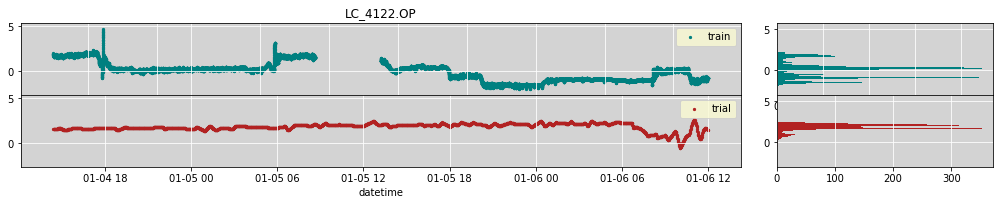

===== FC_4121.PV : [-1.600 - 2.172] =====


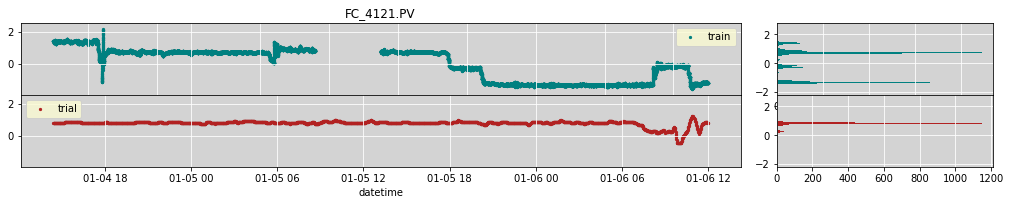

===== FC_4137.PV : [-1.555 - 1.180] =====


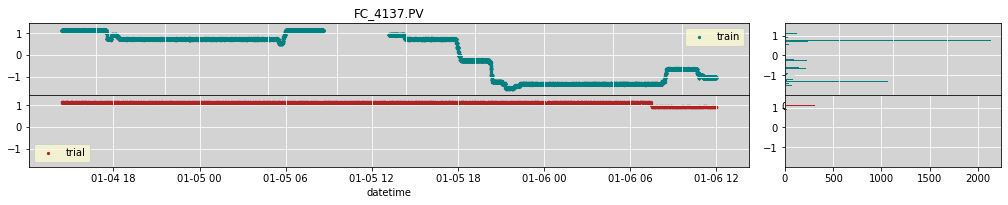

===== TI_4144.PV : [-11.403 - 7.604] =====


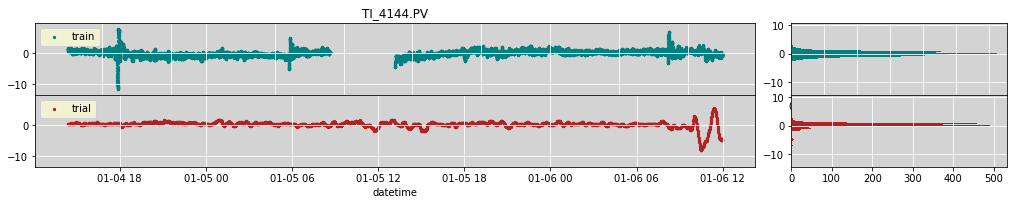

===== PC_4112.PV : [-5.937 - 4.748] =====


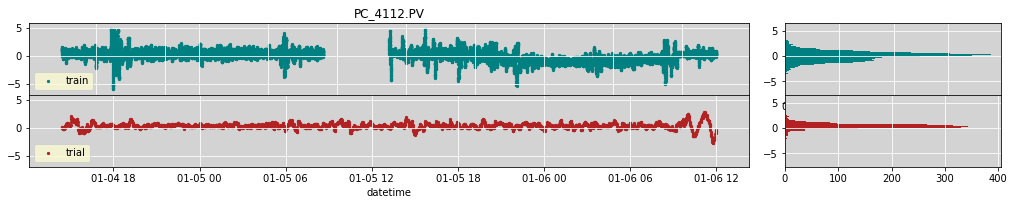

===== FC_4125.PV : [-1.637 - 1.901] =====


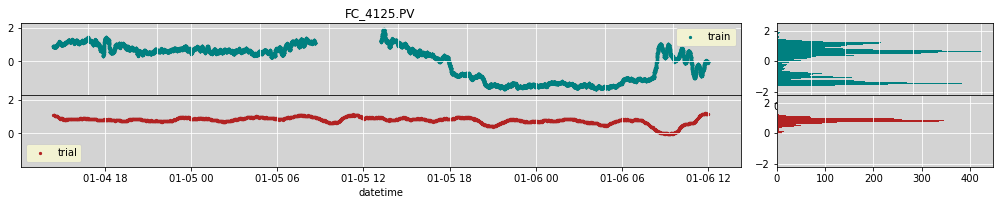

===== FC_4126.PV : [-1.532 - 2.034] =====


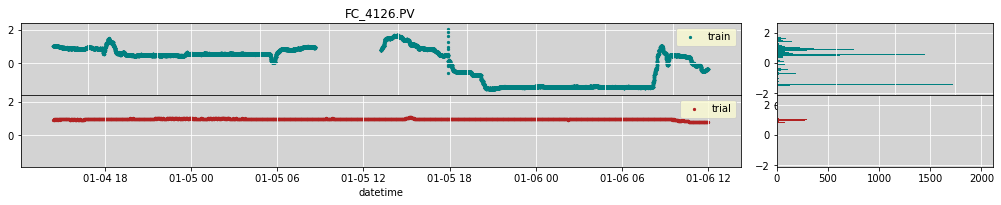

===== LC_4122.PV : [-10.083 - 16.727] =====


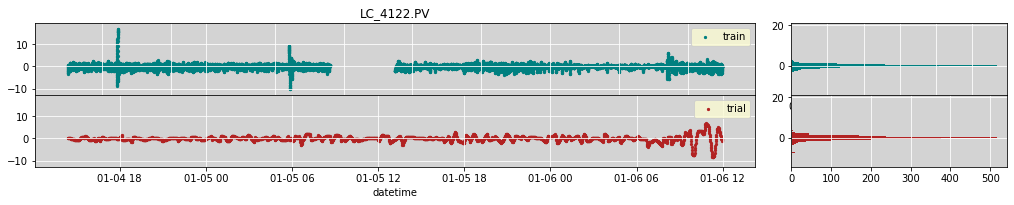

===== FI_4117.PV : [-0.373 - 4.823] =====


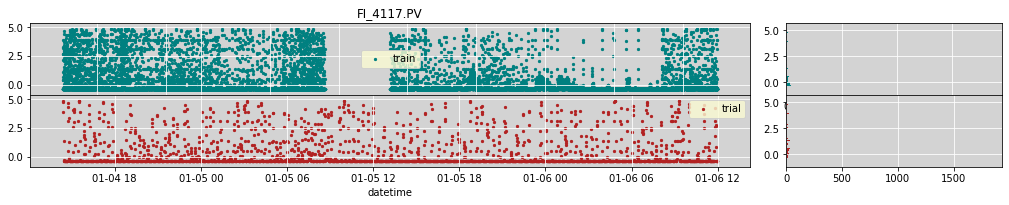

===== AI_41022.PV : [-0.832 - 2.146] =====


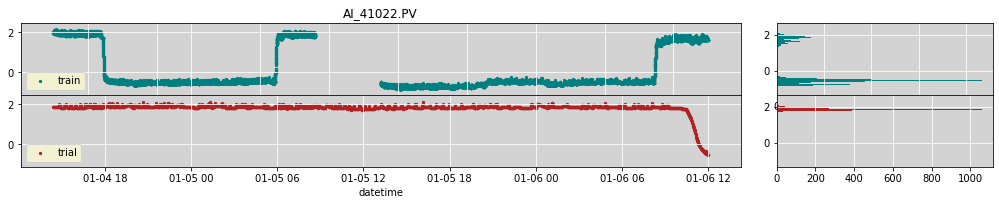

===== FSI4135.PV : [-2.358 - 3.046] =====


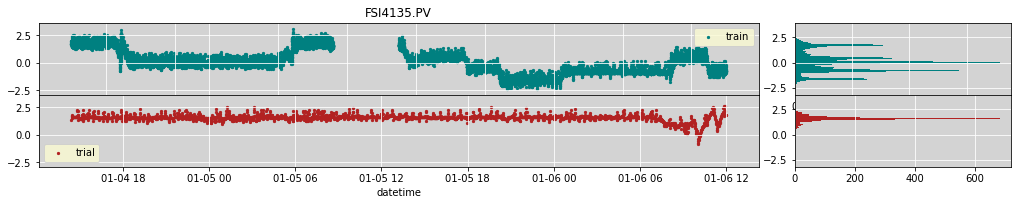

===== TI_4151.PV : [-1.117 - 2.494] =====


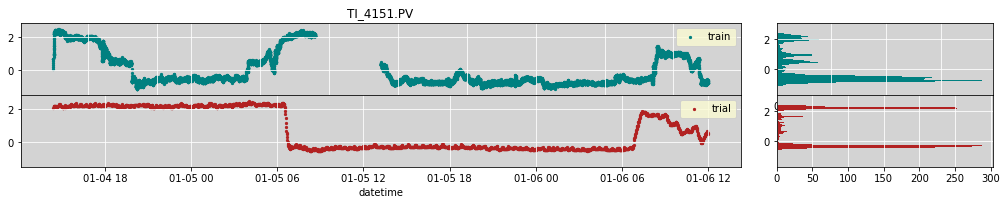

===== PCX4129.PV : [-2.002 - 2.077] =====


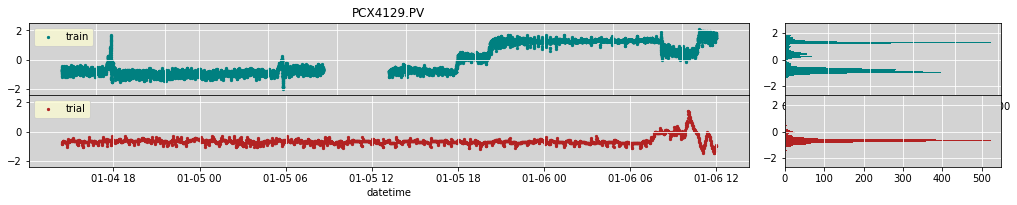

===== HC_4113.OP : [-0.947 - 1.095] =====


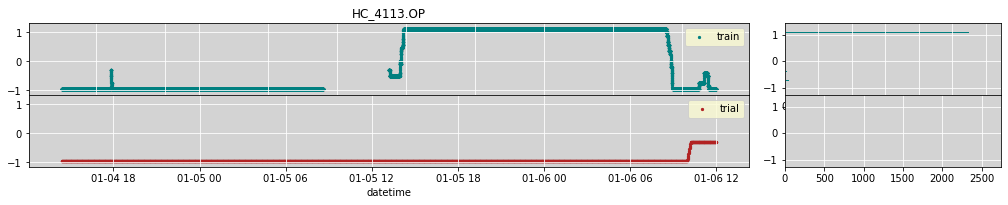

===== FSI4135_2.PV : [-2.358 - 3.046] =====


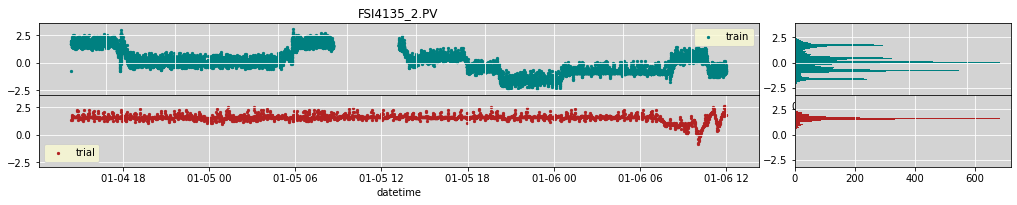

===== FC_4125_2.PV : [-1.637 - 1.901] =====


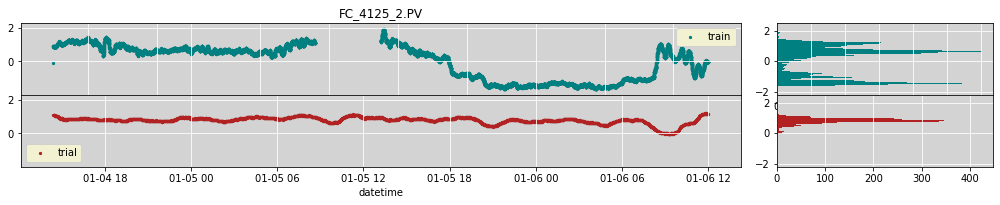

===== Check Outlier Feature Samples =====


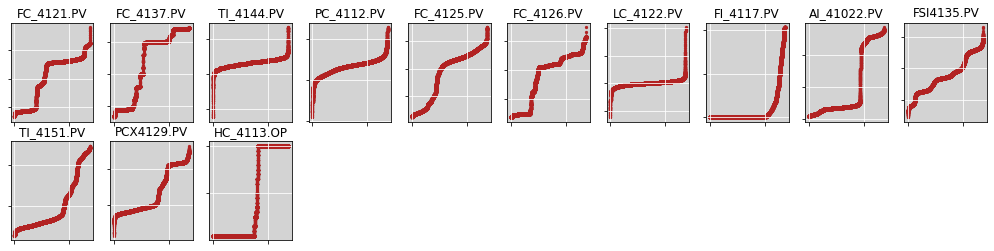

In [ ]:
# Visualize Data
scaler_taget = MinMaxScaler().fit(np.concatenate([train_y_std, trial_y_std]))
scaler_feature = MinMaxScaler().fit(np.concatenate([train_X_std, trial_X_std]))
s_size = 10
for i in range(2):
    # i=0 : target,  i=1 : feature
    if (i==0): # Target
        train_, trial_, col = train_y_std, trial_y_std, df_y.columns.tolist()
        scaler_ = scaler_taget
    else:
        train_, trial_, col = train_X_std, trial_X_std, df_X.columns.tolist()
        scaler_ = scaler_feature
    n_plot = len(col)
    for j in range(n_plot):
        col_ = col[j]
        min_, max_ = scaler_.data_min_[j], scaler_.data_max_[j]
        print('===== {} : [{:.3f} - {:.3f}] ====='.format(col_,min_,max_))
        min_ = min_ - (max_ - min_)*0.1
        max_ = max_ + (max_ - min_)*0.1
        y_range = [min_, max_]
        fig, axis_lst = create_multi_axis_free([[10,1],[3,1]],[1,2],[0.5,0])
        for k in range(2): # k=0 : train,  k=1 : trial
            if (k==0):
                y_, index_, color_, label_, s_ = train_[:,j], train_index, 'teal', 'train', 5
            else:
                y_, index_, color_, label_, s_ = trial_[:,j], trial_index, 'firebrick', 'trial', 5
            
            axis_trend = axis_lst[2*k] # for history
            axis_trend.scatter(index_,y_,s=s_,color=color_,label=label_)
            axis_trend.grid(True)
            axis_trend.legend(loc='best')
            axis_trend.set_ylim(y_range)
            if (k==0):
                axis_trend.set_title(col_)
            elif (k==1):
                axis_trend.set_xlabel('datetime')
            axis_hist = axis_lst[2*k+1] # for histogram
            axis_hist.hist(y_,bins=100,range=y_range,orientation='horizontal',color=color_,label=label_)
            axis_hist.grid(True)
        plt.show()
    
del scaler_taget, scaler_feature
    
    
print('===== Check Outlier Feature Samples =====')
df_x_out = df.loc[:,list_x]
(n_row,n_col) = df_x_out.shape
n_axis_x, axis_size, color_ = 10, 1.5, 'firebrick'
n_axis_y = math.ceil(n_col/n_axis_x)
fig = plt.figure(figsize=((axis_size+0.25)*n_axis_x,(axis_size+0.5)*n_axis_y))
np_x = np.arange(0,n_row,1)
for i in range(n_col):
    plot_, col_ = df_x_out.iloc[:,i].sort_values(),df_x_out.columns[i]
    axis = plt.subplot(n_axis_y,n_axis_x,i+1)
    axis.scatter(np_x,plot_,s=5,color=color_)
    axis.grid(True)
    #axis.set_xlabel('order')
    #axis.set_ylabel('value')
    axis.set_title(col_)
    axis.tick_params(labelleft=False,labelbottom=False)
plt.show()

### 7. Execute Neural Net Learning

In [ ]:
#　Neural Net Module
from tensorflow import keras
#from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.compat.v1.keras import backend as K
from tensorflow.keras.models import Sequential      ## Set NN model
from tensorflow.keras.layers import Dense, Dropout  ## Set Dense
from tensorflow.keras.optimizers import Adam        ## Set Optimization
from tensorflow.keras import regularizers           ## Set Regularizer
from tensorflow.keras.layers import BatchNormalization

In [ ]:
x_input_shape = df_X.shape[1]
print('x_input_shape:', x_input_shape)
y_output_shape = df_y.shape[1]
print('y_output_shape:', y_output_shape)

x_input_shape: 15
y_output_shape: 1


In [ ]:
###　Keras　###
# construct NN
def build_model():
    model = Sequential() ## Set NN model
    model.add(Dense(units=30, input_shape=(15,)))
    model.add(Dropout(0.3))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(units=50))
    model.add(Dropout(0.3))
    model.add(LeakyReLU(alpha=0.1))
#     model.add(Dense(units=100))
#     model.add(Dropout(0.3))
#     model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(units=30))
    model.add(Dropout(0.3))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(units=10))
    model.add(Dropout(0.3))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(units=1)) ## units = Target number
    model.compile(optimizer='adam', loss='mean_squared_error') ## set laerning process
    model.summary()
    print("Model type is ",type(model))
    return model

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def NN_cross_validate(train_X, train_y, n_splits, epoch, kf_shuffle=False, trial=None, \
                      early_stopping = EarlyStopping(monitor='val_loss', min_delta=-0.0001, 
                                                     patience=200, verbose=0, mode='auto')):
    
    
    kf = KFold(n_splits=n_splits, shuffle=kf_shuffle)

    models, train_scores, validation_scores = [],[],[]
    
    # Add by TOKI =====
    trial_scores = []
    if (trial is None):
        trial_exists = False
    else:
        trial_exists = True
        trial_X, trial_y = trial[0], trial[1]
    # Add by TOKI =====
    
    # Add by TOKI =====
    model_id = 0
    # Add by TOKI =====

    for train_index, val_index in kf.split(train_X,train_y):
        
        # Add by TOKI =====
        model_id += 1
        print('\n# Training : Cross-Validation Model ID = {}\n'.format(model_id))
        # Add by TOKI =====

        train_data=train_X[train_index]
        train_label=train_y[train_index]
        val_data=train_X[val_index]
        val_label=train_y_std[val_index]

        model=build_model()
        history=model.fit(train_data,
                          train_label,
                          epochs=epoch,
                          batch_size=128,
                          validation_data=(val_data,val_label),
                          callbacks=[early_stopping],
                          verbose = 1
                         )

        models.append(model)

        loss=history.history['loss']
        val_loss=history.history['val_loss']

        # visualize learning curve
        x = history.epoch
        plt.plot(x, loss, label="loss")
        plt.plot(x, val_loss, label="val_loss")
        plt.title("Learning Curve")
        plt.legend(loc='best')
        plt.xlabel("epoch")
        plt.ylabel("MSE")
        plt.grid()
        plt.show()
        
        pred_train_y_std = model.predict(train_data) ## predict target value by stadalized train data 
        train_score = r2_score(y_true=train_label, y_pred=pred_train_y_std, multioutput='raw_values')
        print('R^2 train_std: %.3f' % train_score)
        train_scores.append(train_score)
        
        pred_val_y_std = model.predict(val_data) ## predict target value by stadalized validation data
        validation_score= r2_score(y_true=val_label, y_pred=pred_val_y_std, multioutput='raw_values') 
        print('R^2 val_std: %.3f' % validation_score)
        validation_scores.append(validation_score)
        
        # Add by TOKI =====
        if (trial_exists):
            pred_trial_y_std = model.predict(trial_X)
            trial_score = r2_score(y_true=trial_y, y_pred=pred_trial_y_std, multioutput='raw_values')
            trial_scores.append(trial_score)
        # Add by TOKI =====


    fig, ax1 = plt.subplots(figsize=(3, 3))
    x = list(range(len(models)))

    ax1.plot(x, train_scores,"-",label="train_scores", lw=1, marker='o', markersize=2, markeredgewidth=4) 
    ax1.plot(x, validation_scores,"-",label="validation_scores", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4)
    
    # Add by TOKI =====
    if (trial_exists):
        ax1.plot(x, trial_scores,"-",label="trial_scores", alpha=0.8, lw=1.5, marker='o', \
                 markersize=2, markeredgewidth=4)

    #ax1.set_title('train_score vs validation_score')
    ax1.set_title('R2 Score of Model')
    ax1.set_xlabel('Various Data')
    ax1.set_ylabel('score')
    ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
    ax1.grid() ## Grid

    plt.show()
    return models

In [ ]:
# epoch, n_k = 1000, 4
# models = NN_cross_validate(train_X_std, train_y_std, n_k, epoch, trial=[trial_X_std, trial_y_std])

In [ ]:
# Output ensemble mean value from each models developed by cross-validation
def def_pred_ensemble(model, df_trial):
    sum_predictedValue = 0
    #for i in range(len(model)):
    sum_predictedValue = sum_predictedValue + model.predict(df_trial)
    pred_ensemble = sum_predictedValue/len(model)
    return pred_ensemble

In [ ]:
pred_ensemble = def_pred_ensemble(models, trial_X_std)
pred_ensemble

array([[1.29433  ],
       [1.3182323],
       [1.3699999],
       ...,
       [1.3591993],
       [1.3444996],
       [1.3219893]], dtype=float32)

In [ ]:
def def_score_ensemble(model, df_trial_X, df_trial_y, target_unit):
    for i in range(len(models)):
        pred_trial_y_std = models[i].predict(df_trial_X) ## predict target value by stadalized trial data
        print('R2 score_{}: %.3f'.format(i) % r2_score(y_true=df_trial_y, y_pred=pred_trial_y_std, multioutput='raw_values'))
        
        pred_trial_y_inv = sc_y.inverse_transform(X=pred_trial_y_std) ## inverse transform to before-standarized-pred_train_y
        true_trial_y_inv = sc_y.inverse_transform(X=df_trial_y) ## inverse transform to before-standarized-pred_true_y       
        print('RMSE[{}]: %.3f\n'.format(target_unit) % np.sqrt(mean_squared_error(true_trial_y_inv, pred_trial_y_inv)))   
    
    # get ensmble score
    pred_ensemble = def_pred_ensemble(model, df_trial_X)
    trial_score = r2_score(y_true = df_trial_y, \
                           y_pred = pred_ensemble,\
                           multioutput='raw_values')
    print('ensemble score: %.3f' %trial_score)
    
    pred_trial_y_inv1 = sc_y.inverse_transform(X=pred_ensemble)
    print('ensemble RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_trial_y_inv, pred_trial_y_inv1)))
    return 

In [ ]:
print("R2 score & RMSE for Trial dataset\n")
score_predictedEnsemble = def_score_ensemble(models, trial_X_std, trial_y_std, "m3/h")

R2 score & RMSE for Trial dataset

R2 score_0: -3.924
RMSE[m3/h]: 6.060

R2 score_1: -1.721
RMSE[m3/h]: 4.505

R2 score_2: -4.413
RMSE[m3/h]: 6.354

R2 score_3: -2.161
RMSE[m3/h]: 4.856

ensemble score: -2.928
ensemble RMSE[m3/h]: 5.413


In [ ]:
select_model_id = -1 # selecet model_id you want to use. put "-1" if you want to use ensemble model

def calc_pred(models,select_model_id,df_x): # switch procedure depends on 1model or ensemble model
    if (select_model_id<0):
        pred_ = def_pred_ensemble(models,df_x)
    else:
        pred_ = models[select_model_id].predict(df_x)
    return pred_

### 8. Predict target value with trial data

In [ ]:
x = df_trial.index

In [ ]:
pred_trial_y_std_ = calc_pred(models, select_model_id, trial_X_std) ## predict target value by stadalized trial data
pred_trial_y_inv = sc_y.inverse_transform(X=pred_trial_y_std_) ## inverse transform to before-standarized-pred_train_y

In [ ]:
target_col, measure_unit = "LC_4122.OP", "[N3/h]"

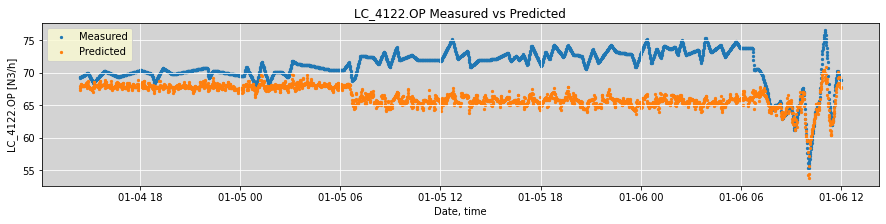

trial_score : -2.928
trial_RMSE: 5.413


In [ ]:
# Plot measured value and predicted value

fig = plt.figure(figsize=(15, 3))
plt.scatter(x,df_y_trial.values.reshape(-1,1),label="Measured", s=5)
plt.scatter(x,pred_trial_y_inv,label="Predicted", s=5)
plt.title('{} Measured vs Predicted'.format(target_col))
plt.xlabel('Date, time')
plt.ylabel(target_col+" "+measure_unit)
plt.legend(loc='best')
plt.grid()
plt.show()
print("trial_score : %.3f" % r2_score(y_true=df_y_trial.values.reshape(-1,1),\
                               y_pred=pred_trial_y_inv))
print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial.values.reshape(-1,1),\
                                                y_pred=pred_trial_y_inv)))

### 9. Checking Error

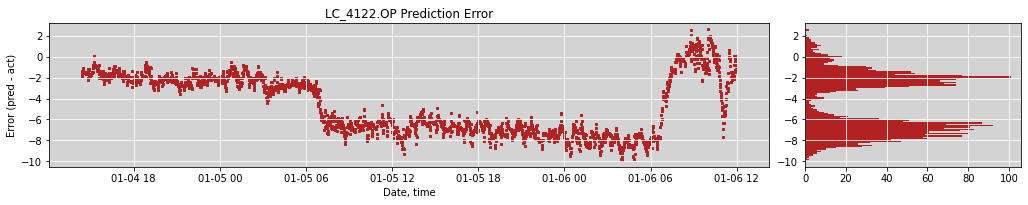

In [ ]:
np_diff = pred_trial_y_inv - np.array(df_y_trial.values.reshape(-1,1))
color_ = 'firebrick'
fig, axis_lst = create_multi_axis_free([[10,2],[3,2]],[1,1],[0.5,0])
axis1 = axis_lst[0]
axis1.scatter(x,np_diff,s=2,label='diff',color=color_,marker='s')
axis1.set_xlabel('Date, time')
axis1.set_ylabel('Error (pred - act)')
axis1.grid(True)
axis1.set_title('{} Prediction Error'.format(target_col))
axis2 = axis_lst[1]
axis2.hist(np_diff,bins=100,orientation='horizontal',color=color_)
axis2.grid(True)
plt.show()

In [ ]:
df_diff = pd.DataFrame(np_diff)
df_diff.columns, df_diff.index = ['error'], x
df_diff.describe()

,error
count,2736.000000
mean,-4.637610
std,2.791778
min,-9.895283
25%,-7.114552
50%,-5.782555
75%,-2.066616
max,2.607683


# High Error Samples
No. of high error :  2553


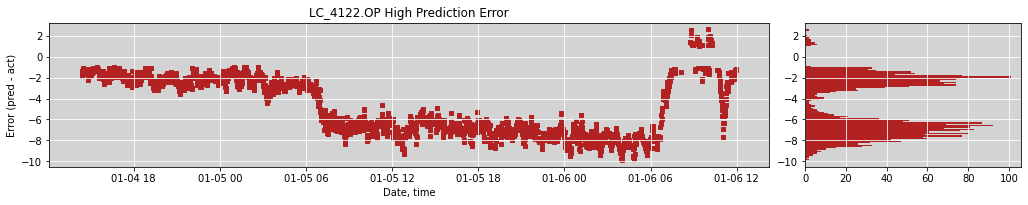

In [ ]:
print('# High Error Samples')
error_thres = 1
lst_index = [i for i in range(df_diff.shape[0]) if abs(df_diff.iloc[i,0])>=error_thres]
n_high = len(lst_index)
if (n_high<20):
    for i in range(n_high):
        index_ = lst_index[i]
        print('{} : {} \t {}'.format(i,df_diff.index[index_],df_diff.iloc[index_,0]))
else:
    print('No. of high error : ',n_high)


df_diff_high = df_diff.iloc[lst_index,0]
color_ = 'firebrick'
fig, axis_lst = create_multi_axis_free([[10,2],[3,2]],[1,1],[0.5,0])
axis1 = axis_lst[0]
axis1.scatter(df_diff_high.index,df_diff_high,s=10,label='diff',color=color_,marker='s')
axis1.set_xlabel('Date, time')
axis1.set_ylabel('Error (pred - act)')
axis1.grid(True)
axis1.set_title('{} High Prediction Error'.format(target_col))
axis2 = axis_lst[1]
axis2.hist(df_diff_high,bins=100,orientation='horizontal',color=color_)
axis2.grid(True)
plt.show()

In [ ]:
def visualize_prediction_error(x,np_act,np_pred,col,measure_unit,error_thres=-9999):
    
    # actual & prediction
    fig = plt.figure(figsize=(15, 2))
    plt.scatter(x,np_act,label="act", s=5)
    plt.scatter(x,np_pred,label="pred", s=5)
    plt.title('{} Act vs Pred'.format(col))
    plt.xlabel('Date, time')
    plt.ylabel(col+" "+measure_unit)
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    # prediction error
    np_diff = np_pred - np_act
    color_ = 'firebrick'
    fig, axis_lst = create_multi_axis_free([[10,1.5],[3,1.5]],[1,1],[0.5,0])
    axis1 = axis_lst[0]
    axis1.scatter(x,np_diff,s=2,label='diff',color=color_,marker='s')
    axis1.set_xlabel('Date, time')
    axis1.set_ylabel('Error (pred - act)')
    axis1.grid(True)
    axis1.set_title('{} Prediction Error'.format(target_col))
    axis2 = axis_lst[1]
    axis2.hist(np_diff,bins=100,orientation='horizontal',color=color_)
    axis2.grid(True)
    plt.show()

    if (error_thres>=0):
        df_diff = pd.DataFrame(np_diff)
        df_diff.index, df_diff.columns = x, ['error']
        df_diff.sort_index(inplace=True)
        lst_index = [i for i in range(df_diff.shape[0]) if abs(df_diff.iloc[i,0])>=error_thres]
        n_high = len(lst_index)
        if (n_high>0):
            print('# High Error Samples : >= {}\n'.format(error_thres))
            print('i : Date \t time \t error')
            for i in range(n_high):
                index_ = lst_index[i]
                print('{} : {} \t {}'.format(i,df_diff.index[index_],df_diff.iloc[index_,0]))



===== Cross-Validation Model : 0


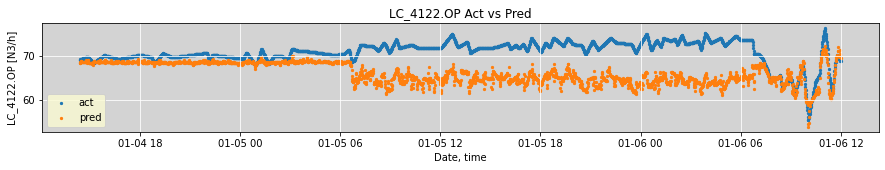

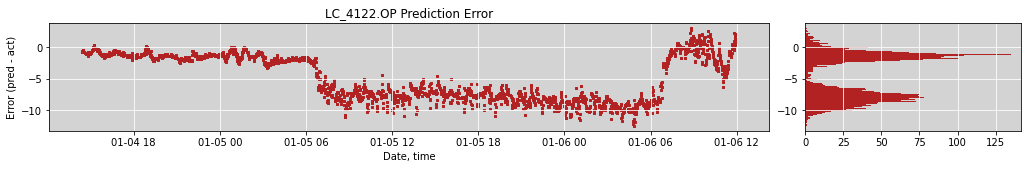

# High Error Samples : >= 8

i : Date 	 time 	 error
0 : 2021-01-05 07:27:00.002000 	 -8.550239349353745
1 : 2021-01-05 07:28:00.002000 	 -8.669340725357443
2 : 2021-01-05 07:32:00.002000 	 -8.885892866335084
3 : 2021-01-05 07:33:00.002000 	 -8.42071995034658
4 : 2021-01-05 08:00:00.002000 	 -8.03863795256126
5 : 2021-01-05 08:01:00.002000 	 -8.527677182907937
6 : 2021-01-05 08:02:00.002000 	 -8.485130719895238
7 : 2021-01-05 08:03:00.002000 	 -8.374022702927476
8 : 2021-01-05 08:04:00.002000 	 -8.248571424240936
9 : 2021-01-05 08:05:00.002000 	 -8.095986203904033
10 : 2021-01-05 08:09:00.002000 	 -8.126979856247772
11 : 2021-01-05 08:10:00.002000 	 -8.93933375334251
12 : 2021-01-05 08:11:00.002000 	 -8.306638364548562
13 : 2021-01-05 08:15:00.002000 	 -8.094170408005596
14 : 2021-01-05 08:16:00.002000 	 -8.028327588791726
15 : 2021-01-05 08:20:00.002000 	 -8.022093094453467
16 : 2021-01-05 08:23:00.002000 	 -8.40507992611849
17 : 2021-01-05 08:24:00.002000 	 -8.507290543183913
18 : 20

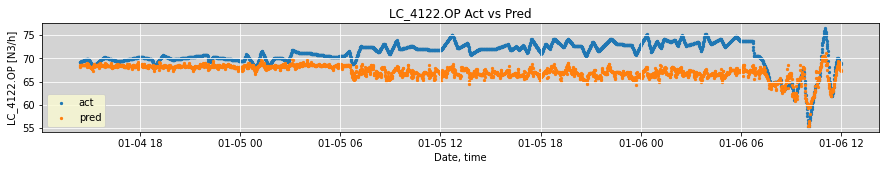

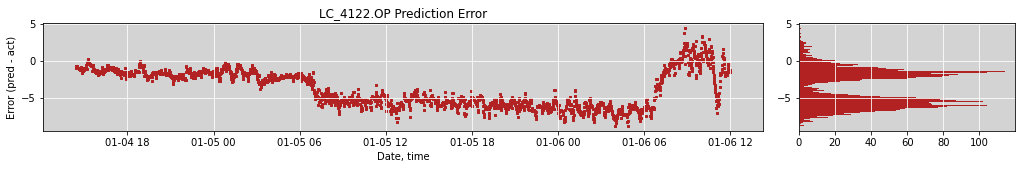

# High Error Samples : >= 8

i : Date 	 time 	 error
0 : 2021-01-05 12:48:00.002000 	 -8.318076742079569
1 : 2021-01-06 00:23:00.003000 	 -8.195510162912939
2 : 2021-01-06 00:24:00.003000 	 -8.228070892893399
3 : 2021-01-06 00:25:00.003000 	 -8.122371735178547
4 : 2021-01-06 00:27:00.003000 	 -8.035080780588714
5 : 2021-01-06 00:28:00.003000 	 -8.184844269358251
6 : 2021-01-06 01:04:00.003000 	 -8.076584197855297
7 : 2021-01-06 02:28:00.003000 	 -8.076233759863143
8 : 2021-01-06 02:29:00.003000 	 -8.232352534277211
9 : 2021-01-06 02:30:00.003000 	 -8.25031060312486
10 : 2021-01-06 03:57:00.003000 	 -8.038486694102659
11 : 2021-01-06 03:58:00.003000 	 -8.795403004315204
12 : 2021-01-06 03:59:00.003000 	 -8.820523049879284
13 : 2021-01-06 04:00:00.003000 	 -8.465889982650395
14 : 2021-01-06 04:01:00.003000 	 -8.22090657362466
15 : 2021-01-06 04:47:00.003000 	 -8.259334577045763
16 : 2021-01-06 04:48:00.003000 	 -8.288380548083225
17 : 2021-01-06 04:52:00.003000 	 -8.783778497301967
18 : 

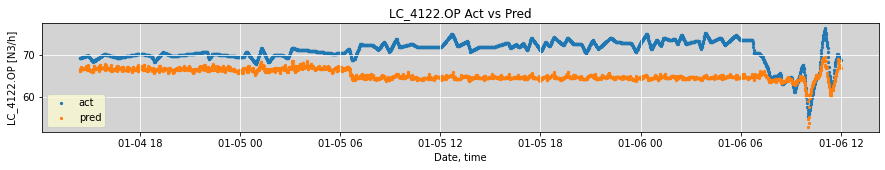

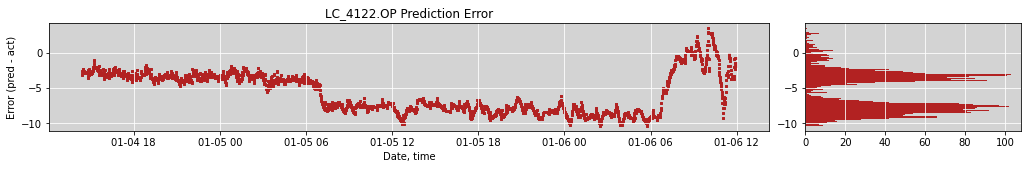

# High Error Samples : >= 8

i : Date 	 time 	 error
0 : 2021-01-05 07:16:00.002000 	 -8.003223883723322
1 : 2021-01-05 07:21:00.002000 	 -8.100268086739817
2 : 2021-01-05 07:22:00.002000 	 -8.110951951757187
3 : 2021-01-05 07:23:00.002000 	 -8.100021742067511
4 : 2021-01-05 07:24:00.002000 	 -8.083766214995023
5 : 2021-01-05 07:25:00.002000 	 -8.06299408636005
6 : 2021-01-05 07:26:00.002000 	 -8.093659335654735
7 : 2021-01-05 07:27:00.002000 	 -8.20721795653148
8 : 2021-01-05 07:28:00.002000 	 -8.189329739029318
9 : 2021-01-05 07:32:00.002000 	 -8.186426161012818
10 : 2021-01-05 07:33:00.002000 	 -8.066426127104393
11 : 2021-01-05 07:47:00.002000 	 -8.068295159222458
12 : 2021-01-05 08:33:00.002000 	 -8.03029736386263
13 : 2021-01-05 08:34:00.002000 	 -8.123223007783523
14 : 2021-01-05 08:35:00.002000 	 -8.178619660005225
15 : 2021-01-05 08:36:00.002000 	 -8.232368363008135
16 : 2021-01-05 08:37:00.002000 	 -8.337893697578139
17 : 2021-01-05 08:38:00.002000 	 -8.178648731240543
18 : 2

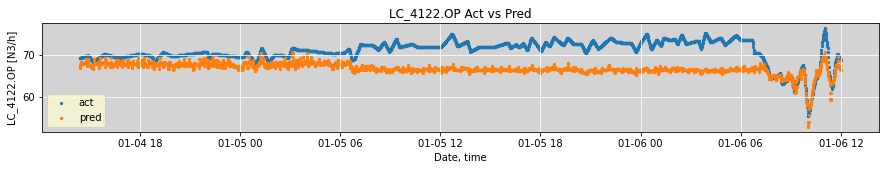

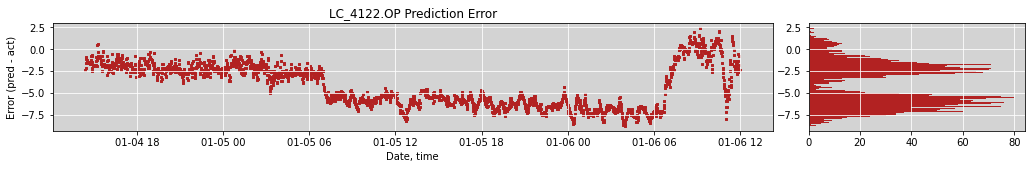

# High Error Samples : >= 8

i : Date 	 time 	 error
0 : 2021-01-05 12:42:00.002000 	 -8.1174029010986
1 : 2021-01-05 12:43:00.002000 	 -8.276691091444803
2 : 2021-01-05 12:44:00.002000 	 -8.202804220106913
3 : 2021-01-06 00:19:00.003000 	 -8.002825428098092
4 : 2021-01-06 00:20:00.003000 	 -8.092828385330193
5 : 2021-01-06 00:21:00.003000 	 -8.174652631624795
6 : 2021-01-06 00:22:00.003000 	 -8.363265313171965
7 : 2021-01-06 00:23:00.003000 	 -8.532264008127783
8 : 2021-01-06 00:24:00.003000 	 -8.439008392893399
9 : 2021-01-06 00:25:00.003000 	 -8.147304596506672
10 : 2021-01-06 02:26:00.003000 	 -8.156529238385573
11 : 2021-01-06 02:27:00.003000 	 -8.321446298928919
12 : 2021-01-06 02:28:00.003000 	 -8.341423884374862
13 : 2021-01-06 02:29:00.003000 	 -8.348723689062368
14 : 2021-01-06 02:30:00.003000 	 -8.388333979589703
15 : 2021-01-06 02:31:00.003000 	 -8.096973505956896
16 : 2021-01-06 03:49:00.003000 	 -8.067272653235392
17 : 2021-01-06 03:50:00.003000 	 -8.262521574947613
18 : 

In [ ]:
np_act = np.array(df_y_trial.values.reshape(-1,1))
for id_ in range(n_k):
    print('\n===== Cross-Validation Model : {}'.format(id_))
    np_pred = calc_pred(models,id_,trial_X_std)
    np_pred_inv = sc_y.inverse_transform(X=np_pred)
    visualize_prediction_error(x,np_act,np_pred_inv,target_col,measure_unit,error_thres=8)

### 10. Save the model

In [ ]:
# select model ID (0, 1, 2, 3)
select_model_id = 3
model = models[select_model_id]
model.save(str(select_model_id) +'_keras_nn_model_FSI4135.h5')

In [ ]:
contents = '[1]: models'
pickle_models = [contents,models]
#pickle_models = [contents, '[2]: models']
print(pickle_models)
tlist=['A','B']
model2=models[1]
model

['[1]: models', [<keras.engine.sequential.Sequential object at 0x7f0de3ed7390>, <keras.engine.sequential.Sequential object at 0x7f0de27b08d0>, <keras.engine.sequential.Sequential object at 0x7f0dd8694290>, <keras.engine.sequential.Sequential object at 0x7f0dd7c03b10>]]


In [ ]:
model3=build_model()
history=model.fit(train_X_std,
                  train_y_std,
                  epochs=10,
                  batch_size=128,
                  validation_data=(train_X_std,train_y_std),
                  callbacks=[EarlyStopping(monitor='val_loss', min_delta=-0.0001, 
                                                     patience=200, verbose=0, mode='auto')],
                  verbose = 1
                  )

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 30)                480       
_________________________________________________________________
dropout_44 (Dropout)         (None, 30)                0         
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 30)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 50)                1550      
_________________________________________________________________
dropout_45 (Dropout)         (None, 50)                0         
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 50)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 30)              

In [ ]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()

In [ ]:
model5=build_model()
model3.weights

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 30)                480       
_________________________________________________________________
dropout_48 (Dropout)         (None, 30)                0         
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 30)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 50)                1550      
_________________________________________________________________
dropout_49 (Dropout)         (None, 50)                0         
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 50)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 30)              

[<tf.Variable 'dense_55/kernel:0' shape=(15, 30) dtype=float32, numpy=
 array([[-0.32070857,  0.32109958, -0.3136169 ,  0.02772549, -0.28187254,
         -0.07212898,  0.1697498 , -0.3357692 ,  0.17824548, -0.35350618,
          0.32042623, -0.07655641, -0.1726741 ,  0.3489231 , -0.17480172,
          0.16835594,  0.16846788, -0.2243426 ,  0.1906712 , -0.10466054,
         -0.06390712, -0.20803773,  0.02223936, -0.34662223,  0.02280915,
          0.20929593, -0.13236983,  0.08173195,  0.20898587,  0.20167512],
        [ 0.11637178, -0.35122716, -0.12018736, -0.02172866,  0.3052264 ,
          0.35777444, -0.2504321 , -0.2353571 ,  0.03064829, -0.04720101,
          0.12199327, -0.3101114 ,  0.2558735 , -0.28156263, -0.27371317,
         -0.12930548, -0.20764214,  0.09070405,  0.2554354 , -0.10759327,
         -0.29694587,  0.16971928,  0.08109614,  0.1591698 , -0.0957523 ,
          0.2846008 , -0.09426412,  0.12939698, -0.17801721,  0.01888865],
        [-0.08315995,  0.11689472,  0.1

In [ ]:
# Error with pickle
import dill
pickle_models=model3
with open('models.pkl', mode='wb') as f:
    dill.dump(pickle_models, f)


In [ ]:
# call  keras model
# from keras.models import load_model
# model = load_model('keras_nn_model_fsi4135.h5')
model3.weights

[<tf.Variable 'dense_55/kernel:0' shape=(15, 30) dtype=float32, numpy=
 array([[-0.32070857,  0.32109958, -0.3136169 ,  0.02772549, -0.28187254,
         -0.07212898,  0.1697498 , -0.3357692 ,  0.17824548, -0.35350618,
          0.32042623, -0.07655641, -0.1726741 ,  0.3489231 , -0.17480172,
          0.16835594,  0.16846788, -0.2243426 ,  0.1906712 , -0.10466054,
         -0.06390712, -0.20803773,  0.02223936, -0.34662223,  0.02280915,
          0.20929593, -0.13236983,  0.08173195,  0.20898587,  0.20167512],
        [ 0.11637178, -0.35122716, -0.12018736, -0.02172866,  0.3052264 ,
          0.35777444, -0.2504321 , -0.2353571 ,  0.03064829, -0.04720101,
          0.12199327, -0.3101114 ,  0.2558735 , -0.28156263, -0.27371317,
         -0.12930548, -0.20764214,  0.09070405,  0.2554354 , -0.10759327,
         -0.29694587,  0.16971928,  0.08109614,  0.1591698 , -0.0957523 ,
          0.2846008 , -0.09426412,  0.12939698, -0.17801721,  0.01888865],
        [-0.08315995,  0.11689472,  0.1

In [ ]:
# models load
with open('models.pkl', mode='rb') as f:
    pickle_in = dill.load(f)
models = pickle_in#[0]
print(models.weights)
#ensmble_pred = calc_pred(models,-1,train_X_std)
#ensmble_pred = models.predict(train_X_std)

[<tf.Variable 'dense_55/kernel:0' shape=(15, 30) dtype=float32, numpy=
array([[-0.32070857,  0.32109958, -0.3136169 ,  0.02772549, -0.28187254,
        -0.07212898,  0.1697498 , -0.3357692 ,  0.17824548, -0.35350618,
         0.32042623, -0.07655641, -0.1726741 ,  0.3489231 , -0.17480172,
         0.16835594,  0.16846788, -0.2243426 ,  0.1906712 , -0.10466054,
        -0.06390712, -0.20803773,  0.02223936, -0.34662223,  0.02280915,
         0.20929593, -0.13236983,  0.08173195,  0.20898587,  0.20167512],
       [ 0.11637178, -0.35122716, -0.12018736, -0.02172866,  0.3052264 ,
         0.35777444, -0.2504321 , -0.2353571 ,  0.03064829, -0.04720101,
         0.12199327, -0.3101114 ,  0.2558735 , -0.28156263, -0.27371317,
        -0.12930548, -0.20764214,  0.09070405,  0.2554354 , -0.10759327,
        -0.29694587,  0.16971928,  0.08109614,  0.1591698 , -0.0957523 ,
         0.2846008 , -0.09426412,  0.12939698, -0.17801721,  0.01888865],
       [-0.08315995,  0.11689472,  0.1609835 , -0.1

In [ ]:
def save_all_models(model):
    for each in range(len(models)):
        models[each].save(str(each) + '_nn_each_model_FSI4135_01.h5')
    return

In [ ]:
save_all_models(models)